<a href="https://colab.research.google.com/github/silverstar0727/study-/blob/master/_posts/NN/CNN_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

Convolutional Neural Network 원리 및 구현

우선적으로 합성곱 신경망에 대해서.. - 합성곱 신경망은 이미지 분류 작업에서 탁월한 성능을 보인다!!

신경망 = 유용한 데이터 특성을 자동적으로 학습하는 기능을 가지고 있음!! 따라서 특성을 추출할때 용이한데, 다층(심층 합성곱) 신경망은 저수준 특성들을 연결하여 고수준 특성을 만드는 역할을 수행함 
ex) 동그라미 -> 강아지

cnn은 두 가지의 중요한 특성으로 인한 이미지 분류가 뛰어나다
> 1. 희소연결: 특성맵(feature map)에 있는 하나의 원소는 하나의 픽셀 패치(patch)에만 연결된다.
2. 파라미터 공유: 동일한 가중치가 입력 이미지의 모든 패치에 사용된다.



## CNN의 구성
여러개의 합성곱(Conv)층 + 풀링(Pooling)(subsampling)층 + 완전 연결(FC)층으로 구성 되어 있다.

완전 연결층은 다층 퍼셉트론으로 구성되어 있다.

### 이산 합성곱(discrete convolution)
#### 1차원 합성곱


합성공의 수학적 식에서 특이할 점은 두 가지가 존재한다.
* 인덱싱의 범위가 -무한대 ~ +무한대
* x의 음수 인덱싱

따라서, 인덱싱의 범위를 유한한 개수로 패딩(padding)을 해야한다. 패딩의 종류는 

1. 풀(full) 패딩 (p = m - 1)
2. 세임(same) 패딩 (동일하게 케바케)
3. 밸리드(valid) 패딩 (p = 0)

존재하고, 세임 패딩은 데이터의 크기가 변하지 않아서 가장 많이 사용된다. 방식은 테두리에 0을 집어넣는 방식으로 패딩한다.



In [0]:
# 1차원 합성곱 단순 구현
import numpy as np

def conv1(x, w, p = 0, s = 1): # x = 입력 데이터, w = 필터 or 커널, p = 패딩크기, s = 필터의 이동간격
  # 패딩이 존재하지 않을 때
  w_rot = np.array(w[::-1]) # 필터를 역순으로
  x_padded = np.array(x) # 입력 데이터

  if p > 0: # 패딩이 존재할 때
    zero_pad = np.zeros(shape = p) # [0, 0, 0, .. p개]
    x_padded = np.concatenate([zero_pad, x_padded, zero_pad]) # 제로 패딩

  res = [] # 합성곱의 결과 값
  for i in range(0, int(len(x)/s), s): # 필터 이동...
    res.append(np.sum(x_padded[i : i + w_rot.shape[0]] * w_rot)) # 결과를 새 행렬에 하나씩 추가함
  
  return np.array(res)

In [2]:
## test
x = [1,3,2,4,5,6,1,3]
w = [1,0,3,1,2]

print('Conv1 구현:', conv1(x, w, p = 2, s = 1))

Conv1 구현: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [3]:
# numpy로 합성곱 수행
print('넘파이 결과', np.convolve(x, w, mode = 'same'))

넘파이 결과 [ 5 14 16 26 24 34 19 22]


#### 2차원 합성곱
2차원도 1차원과 동일하게 수행한다.

(필터를 역전시키기 위해서는 w_rot = w[::-1, ::-1]과 같이 사용한다.)

In [0]:
# 2차원 합성곱 단순 구현
import numpy as np
import scipy.signal

def conv2d(X, W, p = (0,0), s = (1,1)): # p = (0,0)
  W_rot = np.array(W)[::-1, ::-1] # W역순으로 만들기
  X_orig = np.array(X) # X 입력 데이터
  n1 = X_orig.shape[0] + 2*p[0] # 패딩하는 1차원 크기
  n2 = X_orig.shape[1] + 2*p[1] # 패딩하는 2차원 크기
  X_padded = np.zeros(shape = (n1, n2)) # 제로 행렬 만들기
  X_padded[p[0] : p[0] +X_orig.shape[0], p[1]: p[1] + X_orig.shape[1]] = X_orig # 제로 행렬 안에 X 데이터 넣기

  res = [] # 결과 행렬
  for i in range(0, int((X_padded.shape[0] - W_rot.shape[0]) / s[0]) + 1, s[0]): # 1차원 방향으로 움직이기
    res.append([]) # 1차원 뱡향 반복시마다 차원확장
    for j in range(0, int((X_padded.shape[1] - W_rot.shape[1]) / s[1]) + 1, s[1]): # 2차원 방향으로 움직이기
      X_sub = X_padded[i : i + W_rot.shape[0], j : j + W_rot.shape[1]] # 계산하기

      res[-1].append(np.sum(X_sub * W_rot)) # 마지막에 계산값 추가

  return (np.array(res))

In [5]:
## test

X = [[1,3,2,4], [5,6,1,3], [1,2,0,2], [3,4,3,2]]
W = [[1,0,3], [1,2,1], [0,1,1]]

print('Conv2d 구현:', conv2d(X, W, p = (1,1), s = (1,1)))

Conv2d 구현: [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]


In [6]:
# scipy로 구현
scipy.signal.convolve2d(X, W, mode = 'same')

array([[11, 25, 32, 13],
       [19, 25, 24, 13],
       [13, 28, 25, 17],
       [11, 17, 14,  9]])

### subsampling
* 최대 풀링(max pooling)
* 평균 풀링(mean pooling, average pooling)

#### 풀링의 장점
1. 국부적인 작은 변화는 최대 풀링에 영향을 못 미침
2. 특성크기의 감소로 계산의 효율성 향상, 과대 적합을 피할 수 있음


### Drop out을 이용한 신경망 규제

drop out: 앙상블 모델의 (평균적)조합으로 보면 편리하다.

그러나 평균을 내는 것은 많은 비용을 요구하므로 확률적으로 은닉 유닛 일부가 랜덤하게 제거되며, 예측할 때는 모든 뉴련이 함께 참여한다.

평균적으로 p = 0.5(절반의 확률)을 사용한다.



### 다층 CNN 구조(및 구현)

* 입력(batchsize x 28 x 28 x 1(grayscale)) 
* 합성곱_1(batchsize x 24 x 24 x 32(feature map)) - 5 x 5 커널사용
* 풀링_1(batchsize x 12 x 12 x 32) - 2 x 2 풀링 (s = 2?)
* 합성곱_2(batchsize x 8 x 8 x 64) - 5 x 5 커널사용
* 풀링_2(batchsize x 4 x 4 x 64) - 2 x 2 풀링 
* 완전 연결(batchsize x 1024) - flattened
* 완전 연결과 소프트맥스 층(batchsize x 10) - softmax

In [7]:

# google drive와 연동
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
# 연동 테스트 코드
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')

!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
# MNIST dataset을 불러오는 함수 생성
import struct
import numpy as np

def load_mnist(path, kind = 'train'):
  labels_path = path + '/%s-labels.idx1-ubyte' % kind
  images_path = path + '/%s-images.idx3-ubyte' % kind
  print(labels_path, images_path)

  with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    labels = np.fromfile(lbpath, dtype = np.uint8)
        
  with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    images = np.fromfile(imgpath,
                             dtype = np.uint8).reshape(len(labels), 784)

    images = ((images / 255.) - .5) * 2
        
  return images, labels

In [10]:
X_data, y_data = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 'train')
print('행: %d, 열: %d' % (X_data.shape[0], X_data.shape[1]))
X_test, y_test = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 't10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

/content/gdrive/My Drive/machine_learning/ch12/train-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/train-images.idx3-ubyte
행: 60000, 열: 784
/content/gdrive/My Drive/machine_learning/ch12/t10k-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/t10k-images.idx3-ubyte
행: 10000, 열: 784


In [0]:
# 훈련 데이터 & 검증 데이터 분할
X_valid, y_valid = X_data[50000:, :], y_data[50000:]
X_train, y_train = X_data[:50000, :], y_data[:50000]

In [0]:
# 정규화
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_valid_centered = (X_valid - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

In [0]:
# 텐서 조정 (-1, 28, 28, 1)
X_train_centered = X_train_centered.reshape((-1, 28, 28, 1))
X_valid_centered = X_valid_centered.reshape((-1, 28, 28, 1))
X_test_centered = X_test_centered.reshape((-1, 28, 28, 1))

In [0]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

In [15]:
# keras로 CNN 구현
from tensorflow.keras import layers, models

model = models.Sequential()

# 32개의 5x5필터, strides는 정수 2개의 튜플(높이와 넓이 따로 지정가능)(기본값 = 1)
# kernel_initializer = glorot_uniform(기본값), bias_initializer = zeros(기본값)
model.add(layers.Conv2D(32, (5,5), padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2), strides = None)) # strides = None(기본값)
model.add(layers.Conv2D(64, (5,5), padding = 'valid', activation = 'relu'))
model.add(layers.MaxPool2D((2,2), strides = None))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()
# Param은 가중치...(parameters)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [16]:
# 합성곱 신경망 모델 훈련

# 손실함수 = corss entropy, optimizer = adam(볼록하지 않은함수의 최적화), metrics = ['acc'](정확도)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath = '/content/gdrive/My Drive/Colab Notebooks/cnn_checkpoint.h5', monitor = 'val_loss', save_best_only = True), 
                 TensorBoard(log_dir = 'logs/{}'.format(time.asctime()))]

history = model.fit(X_train_centered, y_train_onehot, batch_size = 64, epochs = 20, 
                    validation_data = (X_valid_centered, y_valid_onehot), callbacks = callback_list)

Epoch 1/20
782/782 [==============================] - 63s 80ms/step - loss: 0.1399 - acc: 0.9555 - val_loss: 0.0429 - val_acc: 0.9881
Epoch 2/20
782/782 [==============================] - 62s 79ms/step - loss: 0.0501 - acc: 0.9840 - val_loss: 0.0414 - val_acc: 0.9880
Epoch 3/20
782/782 [==============================] - 62s 79ms/step - loss: 0.0353 - acc: 0.9885 - val_loss: 0.0371 - val_acc: 0.9899
Epoch 4/20
782/782 [==============================] - 62s 80ms/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0349 - val_acc: 0.9914
Epoch 5/20
782/782 [==============================] - 61s 78ms/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0504 - val_acc: 0.9878
Epoch 6/20
782/782 [==============================] - 61s 78ms/step - loss: 0.0200 - acc: 0.9935 - val_loss: 0.0535 - val_acc: 0.9893
Epoch 7/20
782/782 [==============================] - 60s 77ms/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0390 - val_acc: 0.9901
Epoch 8/20
782/782 [==============================] - 61s 78ms

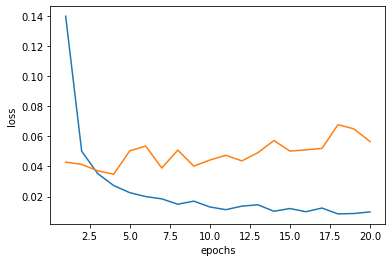

In [17]:
# 손실과 정확도 시각화
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

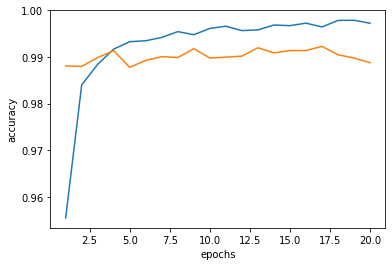

In [19]:
# acc와 val_acc epochs별 시각화
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/cnn_model.h5')

In [0]:
# 모델 불러오기
from tensorflow.keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/Colab Notebooks/cnn_model.h5') # load_model 사용
restored_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/cnn_checkpoint.h5')

In [24]:
# 모델 성능 확인
restored_model.evaluate(X_test_centered, y_test_onehot)

313/313 [==============================] - 3s 11ms/step - loss: 0.0251 - acc: 0.9913


[0.025135623291134834, 0.9912999868392944]